In [141]:
import pydicom
from pydicom import dcmread
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from pydicom.pixel_data_handlers.util import apply_voi_lut

In [142]:
def process_single_img(path, shape=(512, 512)):
    img = pydicom.dcmread(path)
    img.PhotometricInterpretation = 'YBR_FULL'
    img = img.pixel_array
    img = cv2.resize(img, shape)
    img = img - np.min(img)
    if np.max(img) != 0:
        img = img / np.max(img)
    return img

def process_single_img1(path, shape=(512, 512)):
    dcm = pydicom.dcmread(path)
    img = apply_voi_lut(dcm.pixel_array, dcm)
    img = cv2.resize(img, shape)
    img = img - np.min(img)
    if np.max(img) != 0:
        img = img / np.max(img)
    return img

def process_single_img2(path, shape=(512, 512)):
    dcm = pydicom.dcmread(path)
    img = dcm.pixel_array
    try:
        img = img * dcm.RescaleSlope + dcm.RescaleIntercept
    except:
        pass
    img = np.clip(img, -500, 2500).astype(float)
    img = cv2.resize(img, shape)
    img = img + 500
    img = img / 3000
    return img

def process_single_img3(path, shape=(512, 512)):
    dcm = pydicom.dcmread(path)
    img = dcm.pixel_array
    img = img * 10 - 1000
    # img = cv2.resize(img, shape)
    return img

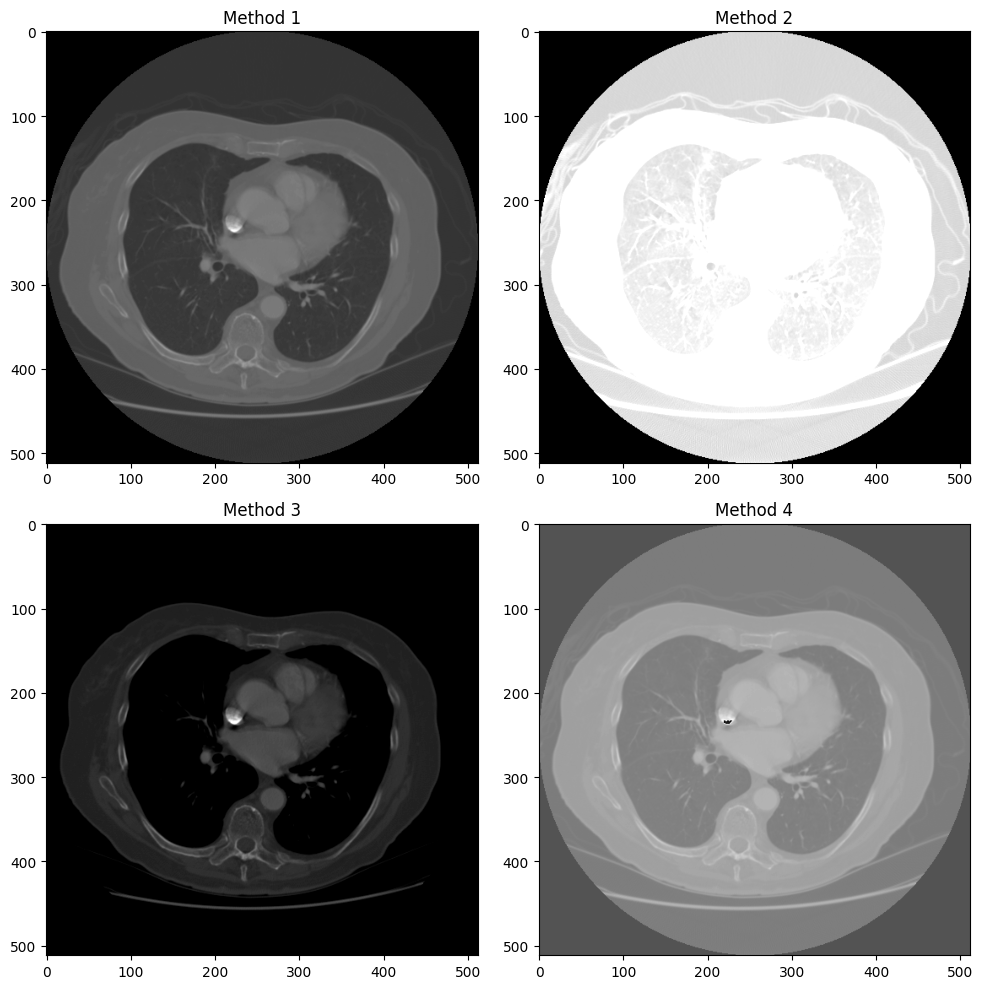

In [143]:
# Path to your DICOM file
base_path = r'C:/Users/Andrew Chen/Desktop/ITRI/ITRI-Cancer/code/data/LIDC-IDRI/LIDC-IDRI-0001'
subfolder = '01-01-2000-NA-NA-30178/3000566.000000-NA-03192'
dcm_file = '1-061.dcm'

# Join them using os.path.join
dicom_file_path = base_path + '/' + subfolder + '/' + dcm_file

# Process image using functions
img1 = process_single_img(dicom_file_path)
img2 = process_single_img1(dicom_file_path)
img3 = process_single_img2(dicom_file_path)
img4 = process_single_img3(dicom_file_path)

# Show all three at once
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('Method 1')
plt.subplot(2, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title('Method 2')
plt.subplot(2, 2, 3)
plt.imshow(img3, cmap='gray')
plt.title('Method 3')
plt.subplot(2, 2, 4)
plt.imshow(img4, cmap='gray')
plt.title('Method 4')
plt.tight_layout()
# plt.show()


Loading dicom files ... This may take a moment.


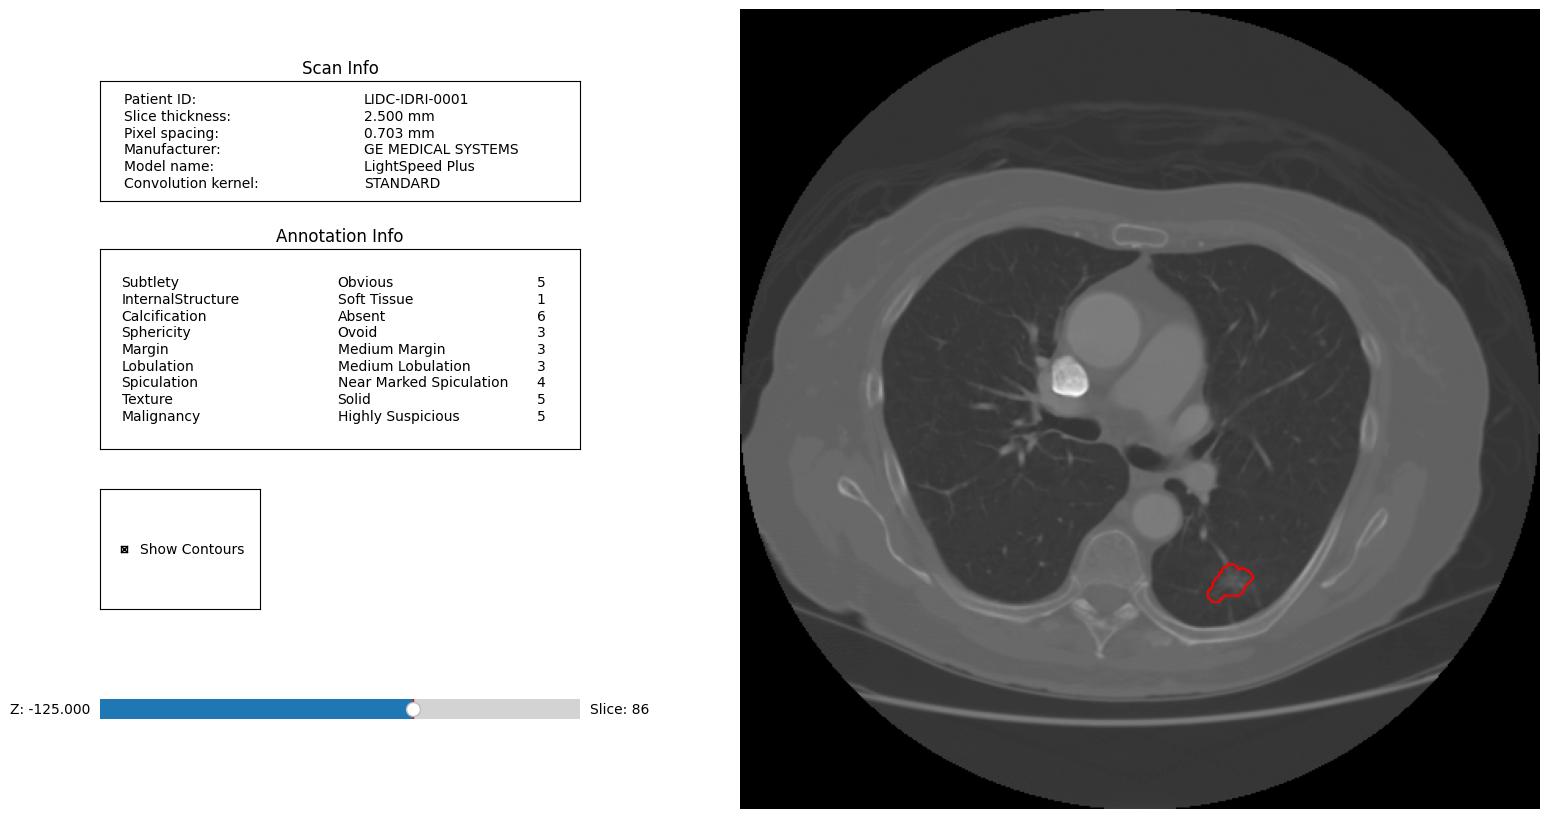

In [144]:
import pylidc as pl

pid = 'LIDC-IDRI-0001'
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()
ann = scan.annotations[0]
ann.visualize_in_scan()